<a href="https://colab.research.google.com/github/ednavivianasegura/ERAP_CursoPython/blob/main/Modulo2_Fundamentos_AI/Clasificacion_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
!git clone https://github.com/ednavivianasegura/ERAP_CursoPython.git

fatal: destination path 'ERAP_CursoPython' already exists and is not an empty directory.


In [23]:
import os
os.chdir("/content/ERAP_CursoPython/Modulo2_Fundamentos_AI")

# KNN (K-Nearest Neighbors) - Clasificación con sklearn

## Introducción

El algoritmo KNN (K-Nearest Neighbors) es un método de clasificación supervisado que asigna una etiqueta
a un nuevo punto de datos basándose en las etiquetas de sus vecinos más cercanos.
Es simple pero efectivo, especialmente en problemas con pocas dimensiones.

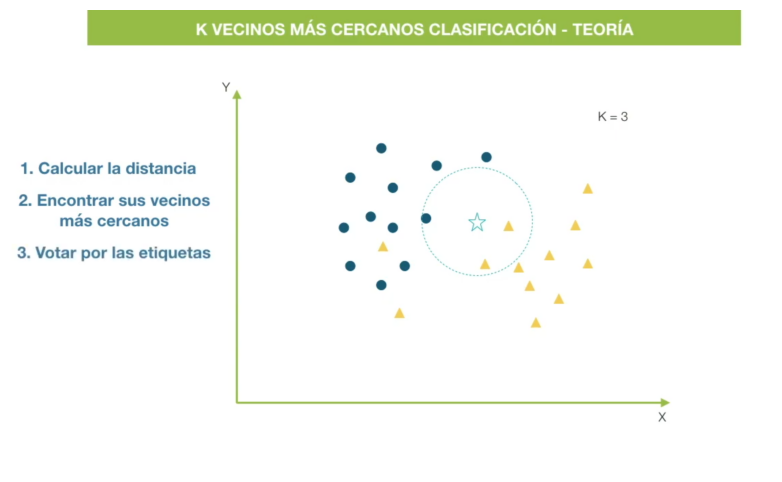

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/KNN_1.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

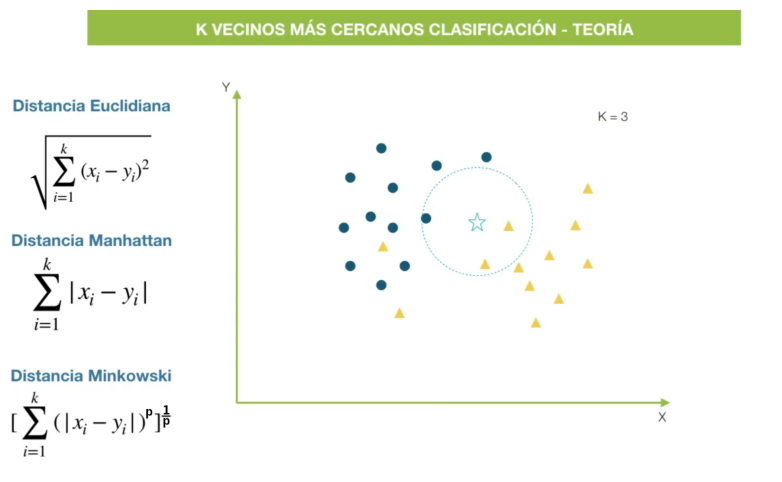

In [25]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/KNN_2.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

**¿Cómo elegir la métrica?**

Empezar con la **Euclidiana** si todo está escalado y normalizado.

Probar **Manhattan** si los datos tienen:

    - muchas variables categóricas codificadas,

    - valores atípicos,

    - gran dimensionalidad.

Si no, probar  **Minkowski** para ajustar el “peso” de las diferencias.

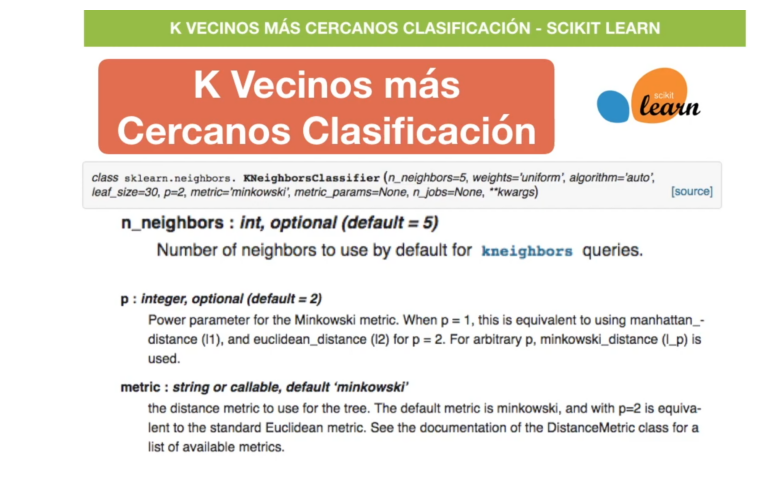

In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/LibreriaKNN.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

In [27]:
## Importar librerías necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import fetch_openml

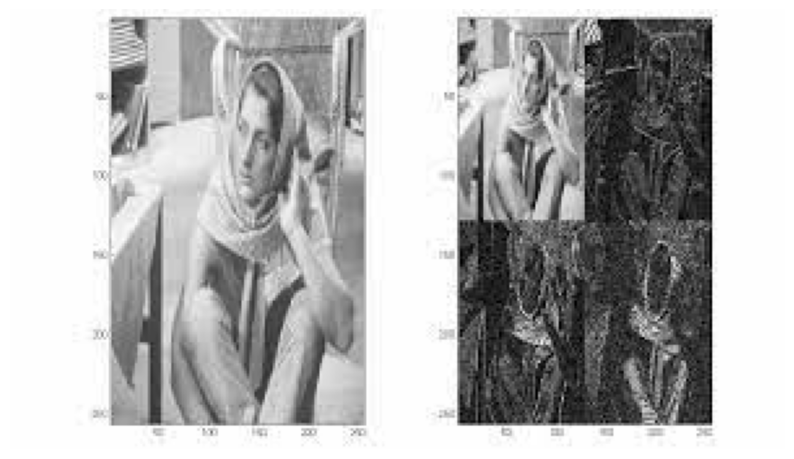

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/Wavelets.jpeg')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

### Conjunto de datos: "Banknote Authentication"

Este conjunto de datos de autenticación de billetes proporciona información para distinguir entre billetes auténticos y falsos. El conjunto de datos consta de características extraídas de imágenes de billetes, en las que cada imagen se procesó mediante técnicas estadísticas para captar detalles importantes para la clasificación. El conjunto de datos puede utilizarse en tareas de clasificación binaria para determinar si un billete es auténtico o falso.

Características

    -Varianza de la imagen transformada Wavelet: Mide la dispersión de los valores de la imagen.
    
    -Asimetría de la imagen transformada Wavelet: Mide la asimetría de la distribución de valores de la imagen.
    
    -Curtosis de la imagen transformada Wavelet (K): Describe las "colas" de la distribución de los valores de la        imagen.
    
    -Entropía de la imagen: Mide la aleatoriedad de la imagen.

In [ ]:
data = fetch_openml(name='banknote-authentication', version=1, as_frame=True)
df = data.frame
# Cambiar los nombres de las columnas
nuevos_nombres = ['Varianza', 'Asimetría', 'Curtosis', 'Entropía', "Clasificacion"]
df.columns = nuevos_nombres
# Mostrar información básica
df.head()
#df["Class"].dtypes

In [ ]:
X = df.drop('Clasificacion', axis=1)
y = df['Clasificacion'].astype(int)

In [ ]:
## Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [ ]:
## Normalizar los datos

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
## Entrenar el modelo KNN

# Vamos a usar k=5 vecinos
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

In [ ]:
## Hacer predicciones
y_pred = knn.predict(X_test)

In [ ]:
## Evaluar el modelo

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

In [ ]:
## Visualización sencilla (usando sólo 2 características para graficar)

X_vis = X[['Varianza', 'Curtosis']]  # Usamos sólo las dos primeras características
X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_vis, y, test_size=0.3, random_state=42)
scaler_vis = StandardScaler()
X_vis_train = scaler_vis.fit_transform(X_vis_train)
X_vis_test = scaler_vis.transform(X_vis_test)

knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_vis_train, y_vis_train)

# Predecir las etiquetas del conjunto de prueba (X_vis_test)
y_vis_pred = knn_vis.predict(X_vis_test)

# Crear una malla para graficar
h = 0.05  # define la resolución de la malla.

# Calcula los límites del gráfico para el eje X y Y.
# Se agrega un margen de 1 unidad alrededor de los datos
# para que la visualización no se recorte.

x_min, x_max = X_vis_train[:, 0].min() - 1, X_vis_train[:, 0].max() + 1 # <-X_vis_train[:,0]:primera característica.
y_min, y_max = X_vis_train[:, 1].min() - 1, X_vis_train[:, 1].max() + 1 # <-X_vis_train[:,1]:segunda característica.

# Crea una rejilla de coordenadas (malla 2D) con todos los puntos del espacio
# en los que se hacen las predicciones.

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Hacer predicciones sobre todos los puntos de la malla.
# Así se obtienen la clase que el modelo KNN asigna a cada punto.

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()]) #<- ravel() convierte las matrices 2D en vectores 1D.
                                                   #<- np.c_[] combina los vectores de coordenadas X e Y
                                                   #   en una sola matriz de entrada para el modelo.


Z = Z.reshape(xx.shape) # <- Convierte el vector Z de vuelta a la forma de la malla xx,
                        #    para que coincida con la estructura de coordenadas y se pueda graficar correctamente.

plt.figure(figsize=(10,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

# y_vis_train: colorea los puntos según su clase real.
# plt.cm.Set1: usa una paleta de colores brillante y contrastante.
# 'k': pone un borde negro alrededor de cada punto.


plt.scatter(X_vis_train[:, 0], X_vis_train[:, 1], c=y_vis_train, cmap=plt.cm.Set1, edgecolor='k', s=40)


plt.title("Fronteras de decisión del KNN (k=5) usando dos características")
plt.xlabel("Varianza")
plt.ylabel("Asimetria")
plt.show()

In [ ]:
## Evaluar el modelo
print("Matriz de confusión:")
print(confusion_matrix(y_vis_test, y_vis_pred))
print("\nReporte de clasificación:")
print(classification_report(y_vis_test, y_vis_pred))